In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve, f1_score
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [2]:
plt.style.use("seaborn-colorblind")

In [3]:
credit = pd.read_csv("NewLoanData.csv")
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Income          252000 non-null  int64
 1   Age             252000 non-null  int64
 2   Experience      252000 non-null  int64
 3   Risk Flag       252000 non-null  int64
 4   Married/Single  252000 non-null  int64
 5   Home Ownership  252000 non-null  int64
 6   Car Ownership   252000 non-null  int64
dtypes: int64(7)
memory usage: 13.5 MB


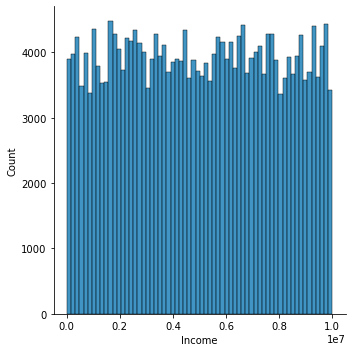

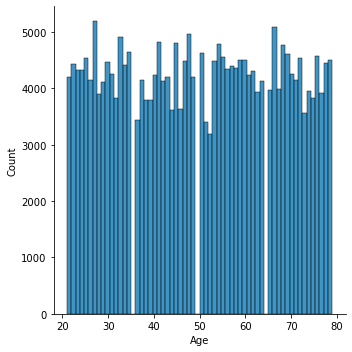

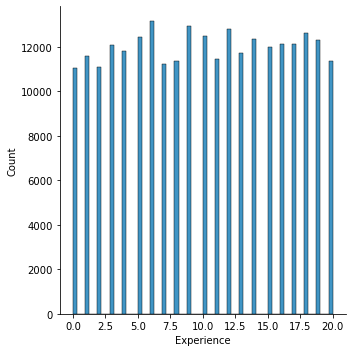

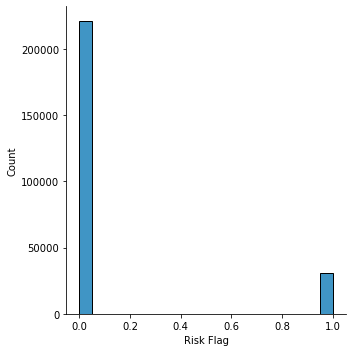

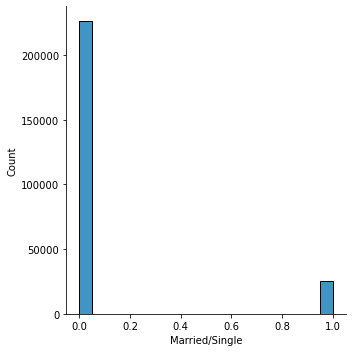

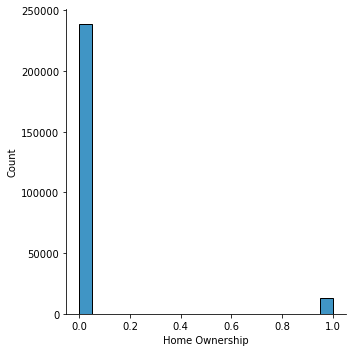

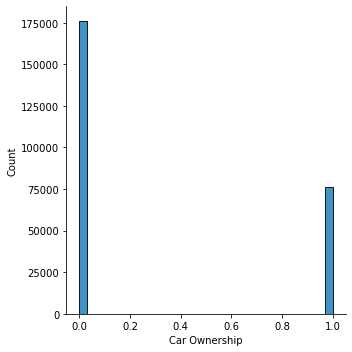

In [4]:
for i in credit.columns:
    sns.displot(credit[i])

In [5]:
credit.corr()

,Income,Age,Experience,Risk Flag,Married/Single,Home Ownership,Car Ownership
Income,1.000000,-0.000652,0.006422,-0.003091,-0.002682,0.000717,0.004068
Age,-0.000652,1.000000,-0.001118,-0.021809,0.005323,0.018865,0.009395
Experience,0.006422,-0.001118,1.000000,-0.034523,0.001752,0.014081,0.007519
Risk Flag,-0.003091,-0.021809,-0.034523,1.000000,-0.021092,-0.023499,-0.024036
Married/Single,-0.002682,0.005323,0.001752,-0.021092,1.000000,-0.023527,-0.001206
Home Ownership,0.000717,0.018865,0.014081,-0.023499,-0.023527,1.000000,0.002317
Car Ownership,0.004068,0.009395,0.007519,-0.024036,-0.001206,0.002317,1.000000


<AxesSubplot:>

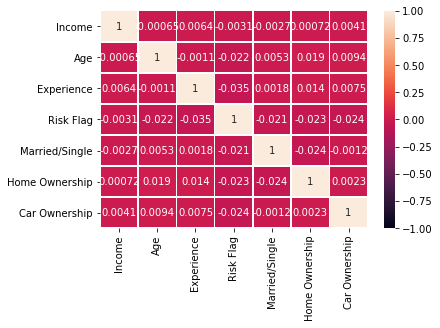

In [6]:
sns.heatmap(credit.corr(), vmin=-1, vmax=1, linewidth=0.5, annot=True)

## Split into test and training 

In [7]:
# Create X and Y variables

X = credit.drop("Risk Flag", axis=1)
y = credit["Risk Flag"]

Stratification:Split using stratification.

In [8]:
# Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (201600, 6)
X_test shape: (50400, 6)


In [10]:
# Default rates?
print(f"Training Default Rate is:   {y_train.mean():.2%}")
print(f"Test Default Rate is:       {y_test.mean():.2%}")

Training Default Rate is:   12.30%
Test Default Rate is:       12.30%


Text(0.5, 1.0, 'Dataset before SMOTE')

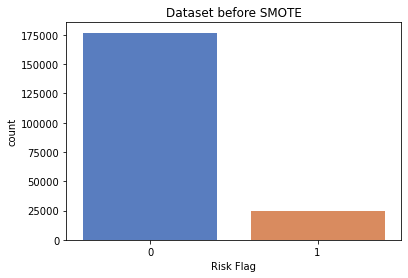

In [11]:

ax=sns.countplot(x = y_train, palette = 'muted')
ax.set_title('Dataset before SMOTE')

# SMOTE for Imbalance Classification

In [12]:
from imblearn.over_sampling import SMOTE


print ('Number of observations in the target variable before oversampling:', np.bincount(y_train) )

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling:', np.bincount(y_train) )

Number of observations in the target variable before oversampling: [176803  24797]

Number of observations in the target variable after oversampling: [176803 176803]


Text(0.5, 1.0, 'Dataset after oversampling')

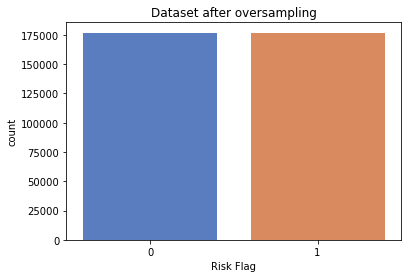

In [13]:
ax=sns.countplot(x = y_train, palette = 'muted')
ax.set_title('Dataset after oversampling')

In [14]:
# What is the default rate in training and test sets?
print(f"Training default rate is {y_train.mean():.2%}")
print(f"Test default rate is     {y_test.mean():.2%}")

Training default rate is 50.00%
Test default rate is     12.30%


In [15]:
#Scale the data 
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Logistic Regression

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(X_train_std, y_train)

LogisticRegression()

In [18]:
# Prob Estimates
lr.predict_proba(X_test_std)

array([[0.53994586, 0.46005414],
       [0.54171793, 0.45828207],
       [0.44831173, 0.55168827],
       ...,
       [0.43630789, 0.56369211],
       [0.48258829, 0.51741171],
       [0.57127711, 0.42872289]])

In [19]:
# Class Labels (0 or 1)
lr.predict(X_test_std)

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [20]:
# Confusion Matrix
confusion_matrix(y_test, lr.predict(X_test_std))

array([[21770, 22431],
       [ 2651,  3548]], dtype=int64)

C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


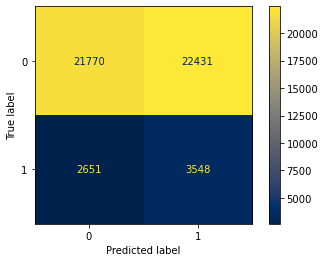

In [21]:
plot_confusion_matrix(lr, X_test_std, y_test, values_format="d", cmap="cividis")

In [22]:
truN, falP, falN, truP = confusion_matrix(y_test, lr.predict(X_test_std)).ravel()
print(f"True Negative: {truN}")
print(f"False Positive: {falP}")
print(f"False Negative: {falN}")
print(f"True Positive: {truP}")

True Negative: 21770
False Positive: 22431
False Negative: 2651
True Positive: 3548


In [23]:
# Accuracy
print(f'Overall Accuracy: {(truN+truP)/len(y_test):.2%}')

Overall Accuracy: 50.23%


In [24]:
# Error Rate
print(f"Error Rate: {1 - accuracy_score(y_test, lr.predict(X_test_std)):.2%}")

Error Rate: 49.77%


In [25]:
print(classification_report(y_test, lr.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.89      0.49      0.63     44201
         Yes       0.14      0.57      0.22      6199

    accuracy                           0.50     50400
   macro avg       0.51      0.53      0.43     50400
weighted avg       0.80      0.50      0.58     50400



C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


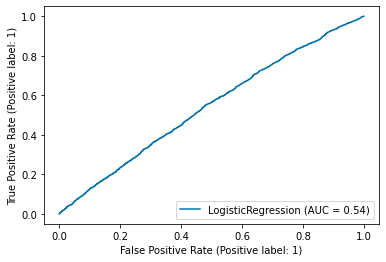

In [26]:
plot_roc_curve(lr, X_test_std, y_test)

C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


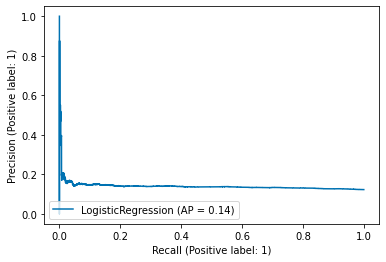

In [27]:
plot_precision_recall_curve(lr, X_test_std, y_test)

# KNN

In [28]:
# k=5
k5 = KNeighborsClassifier(n_neighbors=5)
k5.fit(X_train_std, y_train)

KNeighborsClassifier()

C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


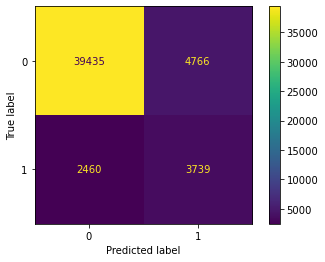

In [29]:
# Plot confusion matrix
confusion_matrix(y_test, k5.predict(X_test_std))
plot_confusion_matrix(k5, X_test_std, y_test)

In [30]:
print(classification_report(y_test, k5.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.94      0.89      0.92     44201
         Yes       0.44      0.60      0.51      6199

    accuracy                           0.86     50400
   macro avg       0.69      0.75      0.71     50400
weighted avg       0.88      0.86      0.87     50400



C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


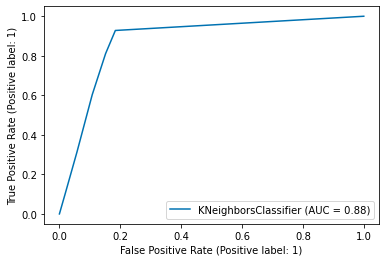

In [31]:
plot_roc_curve(k5, X_test_std, y_test)

C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


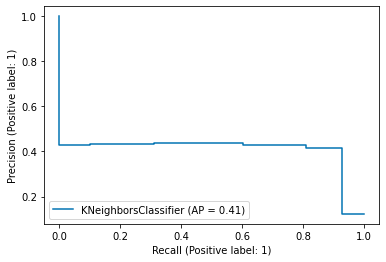

In [32]:
plot_precision_recall_curve(k5, X_test_std, y_test)

# CV for KNN using GridSearchCV

In [33]:
knn_base = KNeighborsClassifier()


In [34]:
scaler2 = StandardScaler().fit(X)
X_s = scaler2.transform(X)

In [35]:
param_grid = {"n_neighbors":np.arange(2,16)}

In [36]:
knnCV = GridSearchCV(knn_base, param_grid, cv=5, scoring="recall")

In [37]:
#knnCV.fit(X_s, y)

In [38]:
#knnCV.best_score_

In [39]:
#knnCV.best_estimator_

CV for KNN using 'GridSearch' was unable to be done because of the time to run the code was greater then an hour. 

# Linear Discriminant Analysis

In [40]:
lda = LinearDiscriminantAnalysis()

In [41]:
lda.fit(X_train_std, y_train)

LinearDiscriminantAnalysis()

In [42]:
confusion_matrix(y_test, lda.predict(X_test_std))

array([[21724, 22477],
       [ 2651,  3548]], dtype=int64)

C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


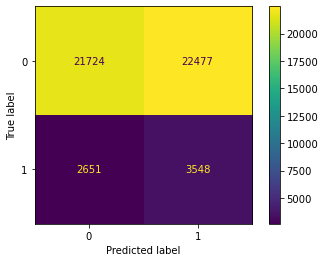

In [43]:
plot_confusion_matrix(lda, X_test_std, y_test)

In [44]:
print(classification_report(y_test, lda.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.89      0.49      0.63     44201
         Yes       0.14      0.57      0.22      6199

    accuracy                           0.50     50400
   macro avg       0.51      0.53      0.43     50400
weighted avg       0.80      0.50      0.58     50400



In [45]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, lda.predict(X_test_std)).ravel()
print(f"True Negative: {tn2}")
print(f"False Positive: {fp2}")
print(f"False Negative: {fn2}")
print(f"True Positive: {tp2}")
print(f'Overall Accuracy: {(tn2+tp2)/len(y_test):.2%}')

True Negative: 21724
False Positive: 22477
False Negative: 2651
True Positive: 3548
Overall Accuracy: 50.14%


In [46]:
print(f"Recall Score: {recall_score(y_test, lda.predict(X_test_std)):.2%}")
print(f"Precision Score: {precision_score(y_test, lda.predict(X_test_std)):.2%}")

print(f" ROC AUC Score: {roc_auc_score(y_test, lda.predict_proba(X_test_std)[:,1]):.2%}")
print(f" ROC AUC Score: {average_precision_score(y_test, lda.predict_proba(X_test_std)[:,1]):.2%}")

Recall Score: 57.24%
Precision Score: 13.63%
 ROC AUC Score: 54.20%
 ROC AUC Score: 14.09%


C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


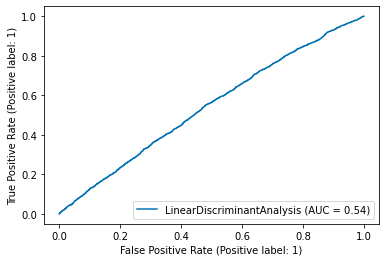

In [47]:
plot_roc_curve(lda, X_test_std, y_test)

C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


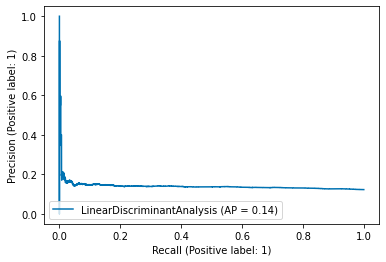

In [48]:
plot_precision_recall_curve(lda, X_test_std, y_test)

# Quadratic Discriminant Analysis

In [49]:
qda = QuadraticDiscriminantAnalysis()

In [50]:
qda.fit(X_train_std, y_train)

QuadraticDiscriminantAnalysis()

In [51]:
confusion_matrix(y_test, qda.predict(X_test_std))

array([[10514, 33687],
       [ 1123,  5076]], dtype=int64)

C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


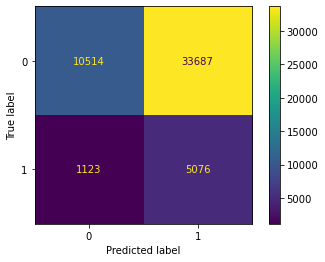

In [52]:
plot_confusion_matrix(qda, X_test_std, y_test)

In [53]:
print(classification_report(y_test, qda.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.90      0.24      0.38     44201
         Yes       0.13      0.82      0.23      6199

    accuracy                           0.31     50400
   macro avg       0.52      0.53      0.30     50400
weighted avg       0.81      0.31      0.36     50400



In [54]:
print(f"Recall Score: {recall_score(y_test, qda.predict(X_test_std)):.2%}")
print(f"Precision Score: {precision_score(y_test, qda.predict(X_test_std)):.2%}")

print(f" ROC AUC Score: {roc_auc_score(y_test, qda.predict_proba(X_test_std)[:,1]):.2%}")
print(f" ROC AUC Score: {average_precision_score(y_test, qda.predict_proba(X_test_std)[:,1]):.2%}")

Recall Score: 81.88%
Precision Score: 13.09%
 ROC AUC Score: 54.11%
 ROC AUC Score: 14.01%


C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


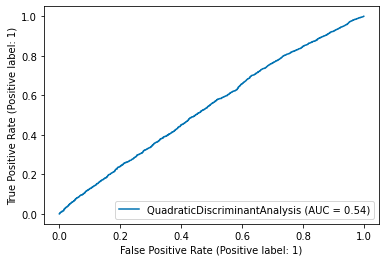

In [55]:
plot_roc_curve(qda, X_test_std, y_test)

C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


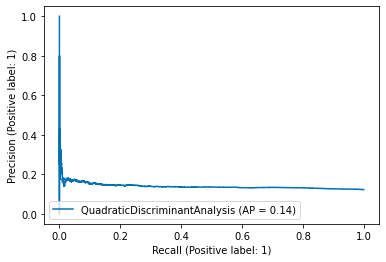

In [56]:
plot_precision_recall_curve(qda, X_test_std, y_test)

# Decision Tree Model

In [57]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std,y_train)
dt_predict = dt.predict(X_test_std)

In [58]:
print(f'Accuracy Score: {accuracy_score (y_test, dt_predict):.2f}')
print(f'AUC Score: {roc_auc_score (y_test, dt_predict):.2f}')
print(f'F1 Score: {f1_score(y_test,dt_predict):.2f}')
print(f'Recall Score: {recall_score(y_test,dt_predict):.2f}')

Accuracy Score: 0.86
AUC Score: 0.86
F1 Score: 0.60
Recall Score: 0.86


In [59]:
print(classification_report(y_test, dt_predict, target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.98      0.86      0.91     44201
         Yes       0.46      0.86      0.60      6199

    accuracy                           0.86     50400
   macro avg       0.72      0.86      0.76     50400
weighted avg       0.91      0.86      0.88     50400



<AxesSubplot:>

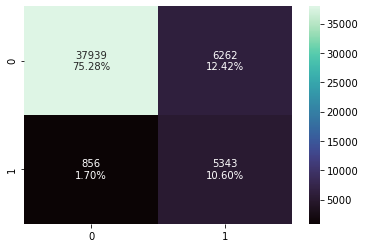

In [60]:
dt_cfm = confusion_matrix(y_test,dt_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                dt_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     dt_cfm.flatten()/np.sum(dt_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(dt_cfm, annot=labels, fmt='', cmap='mako')

C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


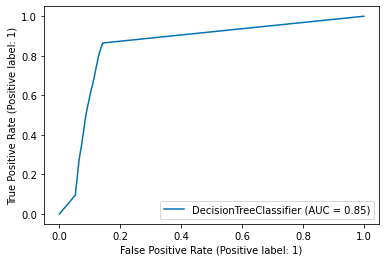

In [61]:
plot_roc_curve(dt, X_test_std, y_test)

C:\Users\volkb\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


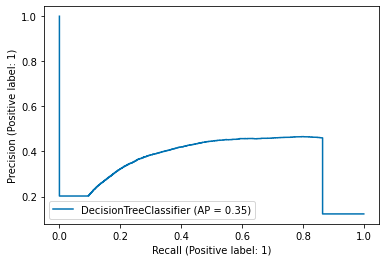

In [62]:
plot_precision_recall_curve(dt, X_test_std, y_test)

## K Fold Decision Tree

In [63]:
# Let's try K=5 fold CV
folds = 5
dtCV = DecisionTreeClassifier()
cvRecall = cross_val_score(dtCV, X, y, cv=folds, scoring='recall')
cvR2 = cross_val_score(dtCV, X, y, cv=folds)

print(cvRecall)


[0.63429585 0.63607033 0.75076625 0.60735603 0.28629032]


In [64]:
totDefaulters = y_test.sum()
totNonDefaulters = len(y_test) - totDefaulters

## Threshold Manipulation

In [65]:
threshold = 0.4
yProb = dt.predict_proba(X_test_std)
print(yProb)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [66]:
tempDF = pd.DataFrame({"True Default Status": y_test, "Predicted Default Status": yProb[:,1]>threshold})
tempDF.sample(11)

,True Default Status,Predicted Default Status
50494,0,False
120224,0,False
7590,0,False
44334,0,False
129838,0,False
227976,0,True
2941,1,True
67279,0,False
198018,0,False
204190,0,False


In [67]:
tempDF.replace(to_replace={0:"No", 1:"Yes", "True":"Yes", "False":"No"},inplace=True)
tempDF.sample(11)

,True Default Status,Predicted Default Status
230688,No,No
138885,No,No
52963,Yes,Yes
244450,No,No
37579,Yes,Yes
223314,No,No
75660,Yes,Yes
46676,No,No
160003,No,No
184575,Yes,Yes


In [68]:
# Find true negative
TN = len(tempDF[(tempDF["True Default Status"]=="No") & (tempDF["Predicted Default Status"]=="No")])
print(TN)

37933


In [69]:
# Find false negative
FN = len(tempDF[(tempDF["True Default Status"]=="No") & (tempDF["Predicted Default Status"]=="Yes")])
print(FN)

6268


In [70]:
# False positive
FP = len(tempDF[(tempDF["True Default Status"]=="Yes") & (tempDF["Predicted Default Status"]=="No")]) 
print(FP)

849


In [71]:
# True positive
TP = len(tempDF[(tempDF["True Default Status"]=="Yes") & (tempDF["Predicted Default Status"]=="Yes")]) 
print(TP)

5350


In [72]:
# Overall Error Rate and Accuracy for threshold of 0.2
print((FN+FP)/len(y_test))

0.14121031746031745


In [73]:
# Look at non-defaulters
print(FN/totNonDefaulters)

0.14180674645370014


In [74]:
# Look at defaulters
print(FP/totDefaulters)

0.13695757380222617


In [75]:
tempDF.groupby(["Predicted Default Status", "True Default Status"]).size().unstack("Predicted Default Status")

Predicted Default Status,No,Yes
True Default Status,,
No,37933,6268
Yes,849,5350


## Random Forest Classifer Prediction 

In [76]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_std,y_train)
rfc_predict = rfc.predict(X_test_std)

In [77]:
print(f'Accuracy Score: {accuracy_score (y_test, rfc_predict):.2f}')
print(f'AUC Score: {roc_auc_score (y_test, rfc_predict):.2f}')
print(f'F1 Score: {f1_score(y_test,rfc_predict):.2f}')
print(f'Recall Score: {recall_score(y_test,dt_predict):.2f}')

Accuracy Score: 0.86
AUC Score: 0.86
F1 Score: 0.60
Recall Score: 0.86


<AxesSubplot:>

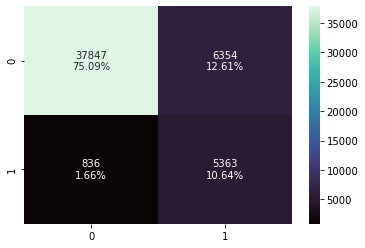

In [78]:
rfc_cfm = confusion_matrix(y_test,rfc_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                rfc_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     rfc_cfm.flatten()/np.sum(rfc_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rfc_cfm, annot=labels, fmt='', cmap='mako')

In [79]:
print(classification_report(y_test, rfc.predict(X_test_std), 
                           target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.98      0.86      0.91     44201
         Yes       0.46      0.87      0.60      6199

    accuracy                           0.86     50400
   macro avg       0.72      0.86      0.76     50400
weighted avg       0.91      0.86      0.87     50400



## Random Forest Threshold Manipulation

In [80]:
threshold = 0.4
yProb = rfc.predict_proba(X_test_std)
print(yProb)

[[1.  0. ]
 [1.  0. ]
 [1.  0. ]
 ...
 [0.5 0.5]
 [1.  0. ]
 [1.  0. ]]


In [81]:
tempDF2 = pd.DataFrame({"True Default Status": y_test, "Predicted Default Status": yProb[:,1]>threshold})
tempDF2.sample(11)

,True Default Status,Predicted Default Status
32908,1,True
157133,0,False
179579,0,False
141453,0,False
246903,0,True
27958,0,True
93899,0,False
184799,0,False
7332,0,False
100850,0,True


In [82]:
tempDF2.replace(to_replace={0:"No", 1:"Yes", "True":"Yes", "False":"No"},inplace=True)
tempDF2.sample(11)

,True Default Status,Predicted Default Status
189504,No,Yes
129441,No,Yes
52224,No,No
129955,No,No
214415,No,No
99619,No,No
41600,No,No
13127,No,Yes
196333,Yes,Yes
165753,No,No


In [83]:
tn = len(tempDF2[(tempDF2["True Default Status"]=="No") & (tempDF2["Predicted Default Status"]=="No")])
print(tn)

37277


In [84]:
fn = len(tempDF2[(tempDF2["True Default Status"]=="No") & (tempDF2["Predicted Default Status"]=="Yes")])
print(fn)

6924


In [85]:
fp = len(tempDF2[(tempDF2["True Default Status"]=="Yes") & (tempDF2["Predicted Default Status"]=="No")]) 
print(fp)

705


In [86]:
tp = len(tempDF2[(tempDF2["True Default Status"]=="Yes") & (tempDF["Predicted Default Status"]=="Yes")]) 
print(tp)

5350


In [87]:
print((fn+fp)/len(y_test))

0.15136904761904763


In [88]:
print(fn/totNonDefaulters)

0.1566480396371123


In [89]:
print(fp/totDefaulters)

0.11372802064849169


## K Fold Random Forest

In [90]:
folds = 5
rfcCV = RandomForestClassifier()
cv_Recall = cross_val_score(rfcCV, X, y, cv=folds, scoring='recall')
cv_R2 = cross_val_score(rfcCV, X, y, cv=folds)

print(cvRecall)

[0.63429585 0.63607033 0.75076625 0.60735603 0.28629032]
